In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 카카오 맵 API 불러오기 위해
import requests
import json

# 상관분석
from sklearn import preprocessing
from scipy.stats import chi2_contingency

# 마포구 상관분석

## 데이터셋 불러오기

In [2]:
mapo_c = pd.read_csv('data/서울특별시 마포구_흡연시설 현황_20220418.csv')
print(mapo_c.shape)
mapo_c.head()

(357, 9)


,시도명,시군구명,상호명,소재지도로명주소,업종,흡연실구분,흡연시설형태,데이터기준일자,Unnamed: 8
0,서울특별시,마포구,3POP 빈티지 PC CAFE,서울특별시 마포구 월드컵북로30길 13,게임제공업소,실내,밀폐형,44669.0,NaN
1,서울특별시,마포구,이룸PC,서울특별시 마포구 마포대로 38,게임제공업소,실내,밀폐형,44669.0,NaN
2,서울특별시,마포구,제노PC방(홍대2),서울특별시 마포구 와우산로 83,게임제공업소,실내,밀폐형,44669.0,NaN
3,서울특별시,마포구,I PC CAFE 홍대역점,서울특별시 마포구 양화로 156,게임제공업소,실내,밀폐형,44669.0,NaN
4,서울특별시,마포구,히어로PC방,서울특별시 마포구 독막로 241,게임제공업소,실내,밀폐형,44669.0,NaN


In [3]:
mapo_cbb = pd.read_csv('data/쓰레기통_위경도/마포구_담배꽁초쓰레기통_위경도.csv')
print(mapo_cbb.shape)
mapo_cbb.head()

(65, 8)


,시군구명,address_name,경도,위도,도로명주소,상호명,수량,세부위치
0,마포구,서울 마포구 광성로6길 66,126.940168,37.547265,서울특별시 마포구 광성로6길 66,마포나루장터,1,NaN
1,마포구,서울 마포구 대흥로 40,126.938931,37.544230,서울특별시 마포구 대흥로 40,블랙시스(아이나비),1,가게앞
2,마포구,서울 마포구 마포대로1길 26,126.942323,37.540314,서울특별시 마포구 마포대로1길 26,성우서서갈비,2,가게안/가게앞
3,마포구,서울 마포구 마포대로1길 46,126.940477,37.541640,서울특별시 마포구 마포대로1길 46,고고네 닭한마리,1,가게앞
4,마포구,서울 마포구 마포대로1길 46,126.940477,37.541640,서울특별시 마포구 마포대로1길 46 우측상가,원마산아구찜,1,재활용수집


In [4]:
mapo_tugi = pd.read_csv('data/서울특별시 마포구 담배꽁초 상습 무단투기 집중관리 지역_20220805.csv')
print(mapo_tugi.shape)
mapo_tugi.head()

(4, 6)


,시도명,시군구명,도로명주소,세부위치,데이터기준일자,Unnamed: 5
0,서울특별시,마포구,서울특별시 마포구 양화로 156,홍대입구역 9번출구 LG팰리스 뒤쪽 도로,2022-08-05,NaN
1,서울특별시,마포구,서울특별시 마포구 양화로 183,홍대입구역 3번출구 인근,2022-08-05,NaN
2,서울특별시,마포구,서울특별시 마포구 마포대로 144,마포T타운 뒤쪽 도로,2022-08-05,NaN
3,서울특별시,마포구,서울특별시 마포구 상암산로 38,kbs 건물 인근,2022-08-05,NaN


In [5]:
mapo_c = mapo_c[['소재지도로명주소']]
mapo_cbb = mapo_cbb[['도로명주소']]
mapo_tugi = mapo_tugi[['도로명주소']]

### mapo_c(흡연구역) 대로명 뽑기

In [6]:
a = mapo_c['소재지도로명주소'].apply(lambda x:x.split(" "))
a

0          [서울특별시, 마포구, 월드컵북로30길, 13]
1              [서울특별시, 마포구, 마포대로, 38]
2              [서울특별시, 마포구, 와우산로, 83]
3              [서울특별시, 마포구, 양화로, 156]
4              [서울특별시, 마포구, 독막로, 241]
                    ...              
352      [서울특별시, 마포구, 독막로, 17, (합정동)]
353         [서울특별시, 마포구, 양화로18안길, 12]
354    [서울특별시, 마포구, 새창로2길, 13, (도화동)]
355         [서울특별시, 마포구, 월드컵로42길, 13]
356    [서울특별시, 마포구, 월드컵로, 212, (성산동)]
Name: 소재지도로명주소, Length: 357, dtype: object

In [7]:
for i in range(len(a)):
    a[i] = a[i][2]

mapo_c['소재지도로명주소']=a

In [8]:
b = mapo_c['소재지도로명주소'].str.split('로')
b

0      [월드컵북, 30길]
1          [마포대, ]
2          [와우산, ]
3           [양화, ]
4           [독막, ]
          ...     
352         [독막, ]
353     [양화, 18안길]
354       [새창, 2길]
355     [월드컵, 42길]
356        [월드컵, ]
Name: 소재지도로명주소, Length: 357, dtype: object

In [9]:
for i in range(len(b)):
    b[i] = b[i][0] + '로'
    
mapo_c['소재지도로명주소'] = b

### mapo_cbb(쓰레기통) 대로명 뽑기

In [10]:
a = mapo_cbb['도로명주소'].apply(lambda x:x.split(" "))

for i in range(len(a)):
    a[i] = a[i][2]

mapo_cbb['도로명주소']=a

b = mapo_cbb['도로명주소'].str.split('로')

for i in range(len(b)):
    b[i] = b[i][0] + '로'

mapo_cbb['도로명주소'] = b

### mapo_tugi(투기지역) 대로명 뽑기

In [11]:
a = mapo_tugi['도로명주소'].apply(lambda x:x.split(" "))

for i in range(len(a)):
    a[i] = a[i][2]

mapo_tugi['도로명주소']=a

b = mapo_tugi['도로명주소'].str.split('로')

for i in range(len(b)):
    b[i] = b[i][0] + '로'

mapo_tugi['도로명주소'] = b

### concat

In [12]:
mapo_m_1 = pd.concat([mapo_c, mapo_cbb], axis=1)
mapo_m_1

,소재지도로명주소,도로명주소
0,월드컵북로,광성로
1,마포대로,대흥로
2,와우산로,마포대로
3,양화로,마포대로
4,독막로,마포대로
...,...,...
352,독막로,NaN
353,양화로,NaN
354,새창로,NaN
355,월드컵로,NaN


In [13]:
mapo_m = pd.concat([mapo_m_1, mapo_tugi], axis=1)
mapo_m

,소재지도로명주소,도로명주소,도로명주소
0,월드컵북로,광성로,양화로
1,마포대로,대흥로,양화로
2,와우산로,마포대로,마포대로
3,양화로,마포대로,상암산로
4,독막로,마포대로,NaN
...,...,...,...
352,독막로,NaN,NaN
353,양화로,NaN,NaN
354,새창로,NaN,NaN
355,월드컵로,NaN,NaN


In [14]:
mapo_m.columns = ['흡연구역', '쓰레기통', '투기지역']

## 검정

In [15]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in mapo_m.columns:
    data_encoded[i] = label.fit_transform(mapo_m[i])
    
data_encoded.head()

,흡연구역,쓰레기통,투기지역
0,31,0,2
1,7,1,2
2,29,2,0
3,26,2,1
4,4,2,3


### 쓰레기통, 흡연구역 상관

In [16]:
df_crosstab = pd.crosstab(data_encoded['쓰레기통'], data_encoded['흡연구역'])
df_crosstab

흡연구역,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
쓰레기통,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,1,2,4,1,0,5,0,1,...,7,9,7,0,0,0,4,0,0,0
4,1,3,4,3,11,14,3,42,6,5,...,9,13,47,8,2,1,19,6,1,2


In [17]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  1,
  2,
  4,
  1,
  0,
  5,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  2,
  1,
  0,
  2,
  0,
  0,
  1,
  4,
  3,
  2,
  7,
  9,
  7,
  0,
  0,
  0,
  4,
  0,
  0,
  0],
 [1,
  3,
  4,
  3,
  11,
  14,
  3,
  42,
  6,
  5,
  9,
  5,
  2,
  3,
  12,
  6,
  1,
  3,
  3,
  2,
  2,
  2,
  2,
  10,
  1,
  8,
  18,
  2,
  1,
  9,
  13,
  47,
  8,
  2,
  1,
  19,
  6,
  1,
  2]]

In [18]:
# 쓰레기통, 흡연구역 상관 없음
chi2_contingency(rows, correction=False)

(83.8033068180671,
 0.9999985859456437,
 152,
 array([[2.80112045e-03, 8.40336134e-03, 1.40056022e-02, 1.40056022e-02,
         4.48179272e-02, 4.20168067e-02, 8.40336134e-03, 1.34453782e-01,
         1.68067227e-02, 1.68067227e-02, 2.80112045e-02, 1.40056022e-02,
         5.60224090e-03, 1.12044818e-02, 3.64145658e-02, 1.68067227e-02,
         2.80112045e-03, 8.40336134e-03, 8.40336134e-03, 1.12044818e-02,
         8.40336134e-03, 5.60224090e-03, 1.12044818e-02, 2.80112045e-02,
         2.80112045e-03, 2.52100840e-02, 6.44257703e-02, 1.40056022e-02,
         8.40336134e-03, 4.76190476e-02, 6.44257703e-02, 1.54061625e-01,
         2.24089636e-02, 5.60224090e-03, 2.80112045e-03, 6.44257703e-02,
         1.68067227e-02, 2.80112045e-03, 5.60224090e-03],
        [2.80112045e-03, 8.40336134e-03, 1.40056022e-02, 1.40056022e-02,
         4.48179272e-02, 4.20168067e-02, 8.40336134e-03, 1.34453782e-01,
         1.68067227e-02, 1.68067227e-02, 2.80112045e-02, 1.40056022e-02,
         5.60224090e

In [19]:
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.24225149966157541


### 쓰레기통, 투기지역 상관

In [20]:
df_crosstab = pd.crosstab(data_encoded['쓰레기통'], data_encoded['투기지역'])
df_crosstab

투기지역,0,1,2,3
쓰레기통,,,,
0,0,0,1,0
1,0,0,1,0
2,1,1,0,2
3,0,0,0,59
4,0,0,0,292


In [21]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[0, 0, 1, 0], [0, 0, 1, 0], [1, 1, 0, 2], [0, 0, 0, 59], [0, 0, 0, 292]]

In [22]:
# 쓰레기통, 투기지역 상관 있음
chi2_contingency(rows, correction=False)

(534.4886685552408,
 1.0018268155530567e-106,
 12,
 array([[2.80112045e-03, 2.80112045e-03, 5.60224090e-03, 9.88795518e-01],
        [2.80112045e-03, 2.80112045e-03, 5.60224090e-03, 9.88795518e-01],
        [1.12044818e-02, 1.12044818e-02, 2.24089636e-02, 3.95518207e+00],
        [1.65266106e-01, 1.65266106e-01, 3.30532213e-01, 5.83389356e+01],
        [8.17927171e-01, 8.17927171e-01, 1.63585434e+00, 2.88728291e+02]]))

In [23]:
# 쓰레기통, 투기지역 상관 있음
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.70643875384688


### 흡연구역, 투기지역 상관

In [24]:
df_crosstab = pd.crosstab(data_encoded['흡연구역'], data_encoded['투기지역'])
df_crosstab

투기지역,0,1,2,3
흡연구역,,,,
0,0,0,0,1
1,0,0,0,3
2,0,0,0,5
3,0,0,0,5
4,0,0,0,16
5,0,0,0,15
6,0,0,0,3
7,0,0,1,47
8,0,0,0,6


In [25]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[0, 0, 0, 1],
 [0, 0, 0, 3],
 [0, 0, 0, 5],
 [0, 0, 0, 5],
 [0, 0, 0, 16],
 [0, 0, 0, 15],
 [0, 0, 0, 3],
 [0, 0, 1, 47],
 [0, 0, 0, 6],
 [0, 0, 0, 6],
 [0, 0, 0, 10],
 [0, 0, 0, 5],
 [0, 0, 0, 2],
 [0, 0, 0, 4],
 [0, 0, 0, 13],
 [0, 0, 0, 6],
 [0, 0, 0, 1],
 [0, 0, 0, 3],
 [0, 0, 0, 3],
 [0, 0, 0, 4],
 [0, 0, 0, 3],
 [0, 0, 0, 2],
 [0, 0, 0, 4],
 [0, 0, 0, 10],
 [0, 0, 0, 1],
 [0, 0, 0, 9],
 [0, 1, 0, 22],
 [0, 0, 0, 5],
 [0, 0, 0, 3],
 [1, 0, 0, 16],
 [0, 0, 0, 23],
 [0, 0, 1, 54],
 [0, 0, 0, 8],
 [0, 0, 0, 2],
 [0, 0, 0, 1],
 [0, 0, 0, 23],
 [0, 0, 0, 6],
 [0, 0, 0, 1],
 [0, 0, 0, 2]]

In [26]:
# p_value < 0.05 이므로 귀무가설 기각
# 흡연구역, 투기지역은 연관 있음
chi2_contingency(rows, correction=False)

(39.583536163768485,
 0.9999999999924872,
 114,
 array([[2.80112045e-03, 2.80112045e-03, 5.60224090e-03, 9.88795518e-01],
        [8.40336134e-03, 8.40336134e-03, 1.68067227e-02, 2.96638655e+00],
        [1.40056022e-02, 1.40056022e-02, 2.80112045e-02, 4.94397759e+00],
        [1.40056022e-02, 1.40056022e-02, 2.80112045e-02, 4.94397759e+00],
        [4.48179272e-02, 4.48179272e-02, 8.96358543e-02, 1.58207283e+01],
        [4.20168067e-02, 4.20168067e-02, 8.40336134e-02, 1.48319328e+01],
        [8.40336134e-03, 8.40336134e-03, 1.68067227e-02, 2.96638655e+00],
        [1.34453782e-01, 1.34453782e-01, 2.68907563e-01, 4.74621849e+01],
        [1.68067227e-02, 1.68067227e-02, 3.36134454e-02, 5.93277311e+00],
        [1.68067227e-02, 1.68067227e-02, 3.36134454e-02, 5.93277311e+00],
        [2.80112045e-02, 2.80112045e-02, 5.60224090e-02, 9.88795518e+00],
        [1.40056022e-02, 1.40056022e-02, 2.80112045e-02, 4.94397759e+00],
        [5.60224090e-03, 5.60224090e-03, 1.12044818e-02, 1.97759

In [27]:
# 0.60 이상이므로 연관이 있음
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.19224832254107846


### 전체 상관 df

In [28]:
# 함수 정의 및 혼동행렬 생성
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs-1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [29]:
rows = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers, 2))
    rows.append(col)

In [30]:
cramers_results = np.array(rows)
cramers_results

array([[1. , 0. , 0. ],
       [0. , 1. , 0.7],
       [0. , 0.7, 1. ]])

In [31]:
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)
df

,흡연구역,쓰레기통,투기지역
흡연구역,1.0,0.0,0.0
쓰레기통,0.0,1.0,0.7
투기지역,0.0,0.7,1.0


# 양천구 상관분석

## 데이터셋 불러오기

In [32]:
yangcheon_c = pd.read_csv('data/서울특별시_양천구_흡연시설 현황_20220801.csv')
print(yangcheon_c.shape)
yangcheon_c.head()

(23, 8)


,자치구,시설 구분,시설형태,설치 위치,규모(제곱미터),설치기관,데이터기준일자,주소
0,양천구,청사,완전개방형,양천구청 부지,8.0,양천구청,2022-08-01,서울특별시 양천구 목동동로 105
1,양천구,청사,완전개방형,해누리타운 4층 옥외정원,8.0,양천구청,2022-08-01,서울특별시 양천구 목동동로 81
2,양천구,청사,완전개방형,양천경찰서 부지,10.0,양천경찰서,2022-08-01,서울특별시 양천구 목동동로 99
3,양천구,청사,개방형,남부지방법원 후문 옆,17.0,남부지방법원,2022-08-01,서울특별시 양천구 신월로 386
4,양천구,청사,개방형,양천세무서 부지 우측,10.0,양천세무서,2022-08-01,서울특별시 양천구 목동동로 165


In [33]:
yangcheon_cbb = pd.read_csv('data/쓰레기통_위경도/양천구_담배꽁초쓰레기통_위경도.csv')
print(yangcheon_cbb.shape)
yangcheon_cbb.head()

(12, 6)


,address_name,경도,위도,도로명주소,설치장소,시군구명
0,서울 양천구 목동동로 293,126.875772,37.528178,서울시 양천구 목동동로 293,현대41타워앞 인도,양천구
1,서울 양천구 목동서로 57,126.879863,37.536632,서울시 양천구 목동서로 57,파리지앙A앞 공용주차장,양천구
2,서울 양천구 오목로 232,126.863206,37.525764,서울시 양천구 오목로 232,보성상가옆 먹자골목,양천구
3,서울 양천구 중앙로 276,126.852884,37.520836,서울시 양천구 중앙로 276,신정네거리역 뒤 먹자골목,양천구
4,서울 양천구 오목로 325,126.873627,37.525107,서울시 양천구 오목로 325,농협 옆 골목,양천구


In [34]:
yangcheon_c = yangcheon_c[['주소']]
yangcheon_cbb = yangcheon_cbb[['도로명주소']]

### mapo_c(흡연구역) 대로명 뽑기

In [35]:
a = yangcheon_c['주소'].apply(lambda x:x.split(" "))

for i in range(len(a)):
    a[i] = a[i][2]

yangcheon_c['주소'] = a

b = yangcheon_c['주소'].str.split('로')

for i in range(len(b)):
    b[i] = b[i][0] + '로'

yangcheon_c['주소'] = b

### mapo_cbb(쓰레기통) 대로명 뽑기

In [36]:
a = yangcheon_cbb['도로명주소'].apply(lambda x:x.split(" "))

for i in range(len(a)):
    a[i] = a[i][2]

yangcheon_cbb['도로명주소']=a

b = yangcheon_cbb['도로명주소'].str.split('로')

for i in range(len(b)):
    b[i] = b[i][0] + '로'

yangcheon_cbb['도로명주소'] = b

## concat

In [37]:
yangcheon_m = pd.concat([yangcheon_c, yangcheon_cbb], axis=1)
yangcheon_m

,주소,도로명주소
0,목동동로,목동동로
1,목동동로,양천구로
2,목동동로,양천구로
3,신월로,중앙로
4,목동동로,오목로
5,목동동로,오목로
6,지양로,양천구로
7,안양천로,양천구로
8,목동로,신정중앙로
9,신정이펜1로,오목로


In [38]:
yangcheon_m.columns = ['흡연구역', '쓰레기통']

## 검정

In [39]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in yangcheon_m.columns:
    data_encoded[i] = label.fit_transform(yangcheon_m[i])
    
data_encoded.head()

,흡연구역,쓰레기통
0,1,0
1,1,2
2,1,2
3,4,4
4,1,3


### 쓰레기통, 흡연구역 상관

In [40]:
df_crosstab = pd.crosstab(data_encoded['쓰레기통'], data_encoded['흡연구역'])
df_crosstab

흡연구역,0,1,2,3,4,5,6,7,8,9
쓰레기통,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,4,0,0,0,0,0,1,0,1
3,0,2,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,1,3,0,3,0,2,0,1,1,0


In [41]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 4, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 2, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 3, 0, 3, 0, 2, 0, 1, 1, 0]]

In [42]:
# 쓰레기통, 흡연구역 상관 없음
chi2_contingency(rows, correction=False)

(65.48030303030305,
 0.02466437384267831,
 45,
 array([[0.04347826, 0.43478261, 0.04347826, 0.13043478, 0.04347826,
         0.08695652, 0.04347826, 0.08695652, 0.04347826, 0.04347826],
        [0.04347826, 0.43478261, 0.04347826, 0.13043478, 0.04347826,
         0.08695652, 0.04347826, 0.08695652, 0.04347826, 0.04347826],
        [0.26086957, 2.60869565, 0.26086957, 0.7826087 , 0.26086957,
         0.52173913, 0.26086957, 0.52173913, 0.26086957, 0.26086957],
        [0.13043478, 1.30434783, 0.13043478, 0.39130435, 0.13043478,
         0.26086957, 0.13043478, 0.26086957, 0.13043478, 0.13043478],
        [0.04347826, 0.43478261, 0.04347826, 0.13043478, 0.04347826,
         0.08695652, 0.04347826, 0.08695652, 0.04347826, 0.04347826],
        [0.47826087, 4.7826087 , 0.47826087, 1.43478261, 0.47826087,
         0.95652174, 0.47826087, 0.95652174, 0.47826087, 0.47826087]]))

In [43]:
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.7545819633372769


### 전체 상관 df

In [44]:
# 함수 정의 및 혼동행렬 생성
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs-1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [45]:
rows = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers, 2))
    rows.append(col)

In [46]:
cramers_results = np.array(rows)
cramers_results

array([[1.  , 0.46],
       [0.46, 1.  ]])

In [47]:
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)
df

,흡연구역,쓰레기통
흡연구역,1.00,0.46
쓰레기통,0.46,1.00


# 영등포구 상관분석

## 데이터셋 불러오기

In [48]:
yeongdeung_cbb = pd.read_csv('data/쓰레기통_위경도/영등포구_담배꽁초쓰레기통_위경도.csv')
print(yeongdeung_cbb.shape)
yeongdeung_cbb.head()

(204, 7)


,address_name,경도,위도,주소,동명,비고,시군구명
0,서울 영등포구 당산로32길 1-6,126.897267,37.526741,서울특별시 영등포구 당산로32길 1-6,당산1동,NaN,영등포구
1,서울 영등포구 국회대로36길 7-3,126.898124,37.526561,서울특별시 영등포구 국회대로36길 7-3,당산1동,NaN,영등포구
2,서울 영등포구 당산로32길 5,126.897474,37.526476,서울특별시 영등포구 당산로32길 5 이차돌,당산1동,NaN,영등포구
3,서울 영등포구 국회대로34길 4,126.897452,37.527212,서울특별시 영등포구 국회대로34길 4 가화,당산1동,NaN,영등포구
4,서울 영등포구 국회대로34길 3,126.897658,37.527155,서울특별시 영등포구 국회대로34길 3,당산1동,NaN,영등포구


In [49]:
yeongdeung_c = pd.read_csv('data/서울특별시 영등포구_흡연구역(실외) 현황_20220429.csv', encoding='cp949')
print(yeongdeung_c.shape)
yeongdeung_c.head()

(68, 11)


,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자


## 주소 변환 테스트

In [ ]:
# lng = '126.898124'
# lat = '37.526561'
# url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
# headers = {"Authorization": 'KakaoAK ###write your key###'}
# results = requests.get(url, headers=headers).json()['documents']

# address = results[0]
# road_address = address['road_address']
# name = road_address['address_name']
# name

In [ ]:
# # 위경도 좌표로 주소 매칭하는 함수
# def GetAddress(lng, lat):
    
#     url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
#     headers = {"Authorization": 'KakaoAK ###write your key###'}
#     results = requests.get(url, headers=headers).json()['documents']
    
#     address = results[0]
#     road_address = address['road_address']
#     name = road_address['address_name']

#     return name

In [ ]:
# lng = '126.8937'
# lat = '37.5398'
# url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
# headers = {"Authorization": 'KakaoAK ###write your key###'}
# results = requests.get(url, headers=headers).json()['documents']

# address = results[0]
# name = address['address']['address_name']
# name

In [ ]:
# # 45번 인덱스 값 에러남
# lng = '126.9042'
# lat = '32.5273'
# url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
# headers = {"Authorization": 'KakaoAK ###write your key###'}
# results = requests.get(url, headers=headers).json()['documents']

# results
# # address = results[0]
# # name = address['address']['address_name']
# # name

In [50]:
# 위경도 좌표로 주소 매칭하는 함수
def GetAddress(lng, lat):
    
    url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?x="+lng+"&y="+lat
    headers = {"Authorization": 'KakaoAK ###write your key###'}
    results = requests.get(url, headers=headers).json()['documents']
    
    address = results[0]
    name = address['address']['address_name']

    return name

In [51]:
getaddresslist = []
for i in range(0,68):
    if i == 45:
        getaddresslist.append(0) # 에러 나는 주소
    else:
        x = yeongdeung_c['경도'][i]
        y = yeongdeung_c['위도'][i]
        print(f'{i}: '+GetAddress(str(x), str(y)))
        getaddresslist.append(GetAddress(str(x), str(y)))   

0: 서울 영등포구 양평동5가 94
1: 서울 영등포구 신길동 1329
2: 서울 영등포구 문래동3가 55-7
3: 서울 영등포구 여의도동 44-14
4: 서울 영등포구 여의도동 61-5
5: 서울 영등포구 여의도동 39
6: 서울 영등포구 여의도동 44-35
7: 서울 영등포구 도림동 821
8: 서울 영등포구 당산동5가 8
9: 서울 영등포구 여의도동 17-1
10: 서울 영등포구 대림동 682
11: 서울 영등포구 당산동3가 80-1
12: 서울 영등포구 여의도동 44-21
13: 서울 영등포구 여의도동 24-4
14: 서울 영등포구 여의도동 45-2
15: 서울 영등포구 양평동5가 1-1
16: 서울 영등포구 여의도동 20
17: 서울 영등포구 여의도동 13-5
18: 서울 영등포구 영등포동2가 29-69
19: 서울 영등포구 도림동 176-9
20: 서울 영등포구 양평동3가 16
21: 서울 영등포구 여의도동 44-35
22: 서울 영등포구 문래동6가 24-1
23: 서울 영등포구 문래동3가 55-20
24: 서울 영등포구 당산동4가 80
25: 서울 영등포구 양평동4가 80
26: 서울 영등포구 영등포동7가 94-57
27: 서울 영등포구 당산동2가 37
28: 서울 영등포구 여의도동 4-3
29: 서울 영등포구 문래동5가 2
30: 서울 영등포구 여의도동 44-24
31: 서울 영등포구 여의도동 35-2
32: 서울 영등포구 문래동1가 39
33: 서울 영등포구 양평동5가 39
34: 서울 영등포구 당산동4가 74-2
35: 서울 영등포구 도림동 266-2
36: 서울 영등포구 당산동5가 8
37: 서울 영등포구 문래동6가 8
38: 서울 영등포구 양평동3가 13
39: 서울 영등포구 당산동5가 11-34
40: 서울 영등포구 여의도동 11-1
41: 서울 영등포구 문래동3가 46
42: 서울 영등포구 문래동3가 82-25
43: 서울 영등포구 문래동3가 58-31
44: 서울 영등포구 양평동5가 106-1
46: 서울 영등포구 양평동3가 17-1

In [52]:
len(getaddresslist)

68

In [53]:
yeongdeung_c['주소']=getaddresslist
yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5


## 지번주소를 도로명으로

In [54]:
# 위경도 좌표로 주소 매칭하는 함수
def GetDoroAddress(jibeon):
    
    url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
    headers = {"Authorization": 'KakaoAK ###write your key###'}
    results = requests.get(url, headers=headers).json()['documents']
    
    address = results[0]
    name = address['road_address']['address_name']

    return name

In [55]:
jibeon = yeongdeung_c['주소'][0]
url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
headers = {"Authorization": 'KakaoAK ###write your key###'}
results = requests.get(url, headers=headers).json()['documents']

address = results[0]
address['road_address']['address_name']
# name = address['address']['address_name']
# name

'서울 영등포구 양평로24길 16'

In [56]:
yeongdeung_c['주소'][5]

'서울 영등포구 여의도동 39'

In [57]:
jibeon = yeongdeung_c['주소'][5]
url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
headers = {"Authorization": 'KakaoAK ###write your key###'}
results = requests.get(url, headers=headers).json()['documents']

address = results[0]
address
# address['road_address']['address_name']
# name = address['address']['address_name']
# name

{'address': {'address_name': '서울 영등포구 여의도동 39',
  'b_code': '1156011000',
  'h_code': '1156054000',
  'main_address_no': '39',
  'mountain_yn': 'N',
  'region_1depth_name': '서울',
  'region_2depth_name': '영등포구',
  'region_3depth_h_name': '여의동',
  'region_3depth_name': '여의도동',
  'sub_address_no': '',
  'x': '126.919386331457',
  'y': '37.5187212849421'},
 'address_name': '서울 영등포구 여의도동 39',
 'address_type': 'REGION_ADDR',
 'road_address': None,
 'x': '126.919386331457',
 'y': '37.5187212849421'}

In [58]:
yeongdeung_c['주소'][28]

'서울 영등포구 여의도동 4-3'

In [59]:
jibeon = yeongdeung_c['주소'][28]
url = "https://dapi.kakao.com/v2/local/search/address.json?query={}".format(jibeon)
headers = {"Authorization": 'KakaoAK ###write your key###'}
results = requests.get(url, headers=headers).json()['documents']

address = results[0]
address
# address['road_address']['address_name']
# name = address['address']['address_name']
# name

{'address': {'address_name': '서울 영등포구 여의도동 4-3',
  'b_code': '1156011000',
  'h_code': '1156054000',
  'main_address_no': '4',
  'mountain_yn': 'N',
  'region_1depth_name': '서울',
  'region_2depth_name': '영등포구',
  'region_3depth_h_name': '여의동',
  'region_3depth_name': '여의도동',
  'sub_address_no': '3',
  'x': '126.930912935984',
  'y': '37.5204287821912'},
 'address_name': '서울 영등포구 여의도동 4-3',
 'address_type': 'REGION_ADDR',
 'road_address': None,
 'x': '126.930912935984',
 'y': '37.5204287821912'}

In [60]:
errorcase = [5, 28, 45, 57]

In [61]:
dorolist = []
for i in range(0, 68):
    if i in errorcase:
        dorolist.append(0)
    else:
        jibeon = yeongdeung_c['주소'][i]
        print(f'{i}: '+GetDoroAddress(jibeon))
        dorolist.append(GetDoroAddress(jibeon))

0: 서울 영등포구 양평로24길 16
1: 서울 영등포구 영등포로 414
2: 서울 영등포구 당산로2길 12
3: 서울 영등포구 여의대방로 383
4: 서울 영등포구 63로 36
6: 서울 영등포구 여의대방로 379
7: 서울 영등포구 도영로 66
8: 서울 영등포구 당산로 203
9: 서울 영등포구 국회대로 750
10: 서울 영등포구 가마산로 356
11: 서울 영등포구 국회대로36길 17
12: 서울 영등포구 국제금융로8길 19
13: 서울 영등포구 여의나루로 77
14: 서울 영등포구 의사당대로 143
15: 서울 영등포구 양평로21길 26
16: 서울 영등포구 여의대로 128
17: 서울 영등포구 국회대로76길 18
18: 서울 영등포구 국회대로54길 35
19: 서울 영등포구 도영로 50
20: 서울 영등포구 양산로 43
21: 서울 영등포구 여의대방로 379
22: 서울 영등포구 선유로13길 25
23: 서울 영등포구 경인로 775
24: 서울 영등포구 당산로41길 11
25: 서울 영등포구 선유로49길 23
26: 서울 영등포구 국회대로55길 4
27: 서울 영등포구 영등포로 103
29: 서울 영등포구 선유로 27
30: 서울 영등포구 여의대방로65길 20
31: 서울 영등포구 국제금융로6길 30
32: 서울 영등포구 경인로82길 3-4
33: 서울 영등포구 양평로 149
34: 서울 영등포구 당산로 171
35: 서울 영등포구 도신로15길 37
36: 서울 영등포구 당산로 203
37: 서울 영등포구 선유로 71
38: 서울 영등포구 양산로 57-5
39: 서울 영등포구 당산로44길 3
40: 서울 영등포구 국회대로76가길 11
41: 서울 영등포구 문래북로 116
42: 서울 영등포구 문래로 83
43: 서울 영등포구 도림로128길 15-1
44: 서울 영등포구 양평로22길 21
46: 서울 영등포구 양산로7길 3
47: 서울 영등포구 영등포로 150
48: 서울 영등포구 국제금융로 78
49: 서울 영등포구 국회대로72길 22
50: 서울

In [62]:
len(dorolist)

68

In [63]:
yeongdeung_c['주소변환']=dorolist
yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소,주소변환
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94,서울 영등포구 양평로24길 16
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329,서울 영등포구 영등포로 414
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7,서울 영등포구 당산로2길 12
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14,서울 영등포구 여의대방로 383
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5,서울 영등포구 63로 36


## 쓰레기통 도로명만 추출

In [64]:
a = yeongdeung_cbb['address_name'].apply(lambda x:x.split(" "))

for i in range(len(a)):
    a[i] = a[i][2]

yeongdeung_cbb['address_name']=a

b = yeongdeung_cbb['address_name'].str.split('로')

for i in range(len(b)):
    b[i] = b[i][0] + '로'
    
yeongdeung_cbb['address_name'] = b

yeongdeung_cbb.head()

,address_name,경도,위도,주소,동명,비고,시군구명
0,당산로,126.897267,37.526741,서울특별시 영등포구 당산로32길 1-6,당산1동,NaN,영등포구
1,국회대로,126.898124,37.526561,서울특별시 영등포구 국회대로36길 7-3,당산1동,NaN,영등포구
2,당산로,126.897474,37.526476,서울특별시 영등포구 당산로32길 5 이차돌,당산1동,NaN,영등포구
3,국회대로,126.897452,37.527212,서울특별시 영등포구 국회대로34길 4 가화,당산1동,NaN,영등포구
4,국회대로,126.897658,37.527155,서울특별시 영등포구 국회대로34길 3,당산1동,NaN,영등포구


## 흡연구역 도로명만 추출

In [65]:
yeongdeung_c.drop(yeongdeung_c[yeongdeung_c['주소변환']==0].index, inplace=True)

In [66]:
yeongdeung_c = yeongdeung_c.reset_index()

In [67]:
yeongdeung_c = yeongdeung_c.drop(columns={'index'})
yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소,주소변환
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94,서울 영등포구 양평로24길 16
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329,서울 영등포구 영등포로 414
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7,서울 영등포구 당산로2길 12
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14,서울 영등포구 여의대방로 383
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5,서울 영등포구 63로 36


In [68]:
a = []
for i in range(0, 64):
    print(f'{i}', yeongdeung_c['주소변환'][i].split(' '))
    a.append(yeongdeung_c['주소변환'][i].split(' '))

0 ['서울', '영등포구', '양평로24길', '16']
1 ['서울', '영등포구', '영등포로', '414']
2 ['서울', '영등포구', '당산로2길', '12']
3 ['서울', '영등포구', '여의대방로', '383']
4 ['서울', '영등포구', '63로', '36']
5 ['서울', '영등포구', '여의대방로', '379']
6 ['서울', '영등포구', '도영로', '66']
7 ['서울', '영등포구', '당산로', '203']
8 ['서울', '영등포구', '국회대로', '750']
9 ['서울', '영등포구', '가마산로', '356']
10 ['서울', '영등포구', '국회대로36길', '17']
11 ['서울', '영등포구', '국제금융로8길', '19']
12 ['서울', '영등포구', '여의나루로', '77']
13 ['서울', '영등포구', '의사당대로', '143']
14 ['서울', '영등포구', '양평로21길', '26']
15 ['서울', '영등포구', '여의대로', '128']
16 ['서울', '영등포구', '국회대로76길', '18']
17 ['서울', '영등포구', '국회대로54길', '35']
18 ['서울', '영등포구', '도영로', '50']
19 ['서울', '영등포구', '양산로', '43']
20 ['서울', '영등포구', '여의대방로', '379']
21 ['서울', '영등포구', '선유로13길', '25']
22 ['서울', '영등포구', '경인로', '775']
23 ['서울', '영등포구', '당산로41길', '11']
24 ['서울', '영등포구', '선유로49길', '23']
25 ['서울', '영등포구', '국회대로55길', '4']
26 ['서울', '영등포구', '영등포로', '103']
27 ['서울', '영등포구', '선유로', '27']
28 ['서울', '영등포구', '여의대방로65길', '20']
29 ['서울', '영등포구', '국제금융로6길', '30']
30 ['서울',

In [69]:
for i in range(len(a)):
    a[i] = a[i][2]

for i in range(len(yeongdeung_c)):
    yeongdeung_c['주소변환'] = a

b = yeongdeung_c['주소변환'].str.split('로')

for i in range(len(b)):
    b[i] = b[i][0] + '로'
    

yeongdeung_c['주소변환']=b

yeongdeung_c.head()

,자치구,시설 구분,시설형태,설치 위치,위도,경도,규모(제곱미터),설치일,설치 주체,관리여부,관리,주소,주소변환
0,영등포구,한강프리젠,완전개방형,실외,37.5398,126.8937,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 양평동5가 94,양평로
1,영등포구,프리가,완전개방형,실외,37.5125,126.9238,10.0,NaN,건물관리자,여,건물관리자,서울 영등포구 신길동 1329,영등포로
2,영등포구,에이스 테크노타워,완전개방형,실외,37.5150,126.8959,60.0,NaN,건물관리자,여,건물관리자,서울 영등포구 문래동3가 55-7,당산로
3,영등포구,고려빌딩,개방형,실외,37.5193,126.9314,330.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 44-14,여의대방로
4,영등포구,리버타워오피스텔,개방형,실외,37.5195,126.9386,17.0,NaN,건물관리자,여,건물관리자,서울 영등포구 여의도동 61-5,63로


## concat

In [70]:
yeongdeung_c_m = yeongdeung_c[['위도', '경도', '주소변환']]
yeongdeung_c_m.head()

,위도,경도,주소변환
0,37.5398,126.8937,양평로
1,37.5125,126.9238,영등포로
2,37.5150,126.8959,당산로
3,37.5193,126.9314,여의대방로
4,37.5195,126.9386,63로


In [71]:
yeongdeung_cbb_m = yeongdeung_cbb[['위도', '경도', 'address_name']]
yeongdeung_cbb_m.head()

,위도,경도,address_name
0,37.526741,126.897267,당산로
1,37.526561,126.898124,국회대로
2,37.526476,126.897474,당산로
3,37.527212,126.897452,국회대로
4,37.527155,126.897658,국회대로


In [72]:
yeongdeung_m = pd.concat([yeongdeung_cbb_m, yeongdeung_c_m], axis=1)
yeongdeung_m.head()

,위도,경도,address_name,위도,경도,주소변환
0,37.526741,126.897267,당산로,37.5398,126.8937,양평로
1,37.526561,126.898124,국회대로,37.5125,126.9238,영등포로
2,37.526476,126.897474,당산로,37.5150,126.8959,당산로
3,37.527212,126.897452,국회대로,37.5193,126.9314,여의대방로
4,37.527155,126.897658,국회대로,37.5195,126.9386,63로


In [73]:
yeongdeung_m.columns = ['쓰레기통위도', '쓰레기통경도', '쓰레기통', '흡연구역위도', '흡연구역경도', '흡연구역']
yeongdeung_m.head()

,쓰레기통위도,쓰레기통경도,쓰레기통,흡연구역위도,흡연구역경도,흡연구역
0,37.526741,126.897267,당산로,37.5398,126.8937,양평로
1,37.526561,126.898124,국회대로,37.5125,126.9238,영등포로
2,37.526476,126.897474,당산로,37.5150,126.8959,당산로
3,37.527212,126.897452,국회대로,37.5193,126.9314,여의대방로
4,37.527155,126.897658,국회대로,37.5195,126.9386,63로


## 검정

In [74]:
df_crosstab = pd.crosstab(yeongdeung_m['쓰레기통'], yeongdeung_m['흡연구역'])
df_crosstab = pd.pivot_table(yeongdeung_m, index='쓰레기통', columns='흡연구역')
df_crosstab

쓰레기통경도                                                              \
흡연구역          63로        가마산로         경인로       국제금융로        국회대로         당산로   
쓰레기통                                                                            
국회대로   126.897658         NaN         NaN         NaN         NaN         NaN   
당산로           NaN  126.896451  126.896675  126.901767  126.900619  126.897474   
대림로           NaN         NaN  126.903016  126.903906  126.904726         NaN   
도림로           NaN         NaN         NaN         NaN         NaN         NaN   
디지털로          NaN         NaN         NaN  126.902738  126.903045  126.906470   
버드나루로         NaN         NaN         NaN         NaN         NaN  126.909109   
시흥대로          NaN         NaN         NaN         NaN  126.906860         NaN   
신길로           NaN         NaN         NaN         NaN  126.908021  126.908021   
양산로           NaN         NaN         NaN         NaN  126.897405  126.897577   
양평로           NaN         NaN         NaN  126.900525  126.900670         NaN   

                                                     ...   흡연구역위도            \
흡연구역         도림로         도신로        도영로         문래로  ...     선유서로       양산로   
쓰레기통                                                 ...                      
국회대로         NaN         NaN        NaN         NaN  ...      NaN       NaN   
당산로          NaN         NaN  126.90117         NaN  ...      NaN  37.52550   
대림로          NaN         NaN        NaN         NaN  ...  37.5252  37.52540   
도림로          NaN  126.901309        NaN         NaN  ...      NaN       NaN   
디지털로   126.90421         NaN        NaN  126.904044  ...      NaN  37.52545   
버드나루로        NaN         NaN        NaN         NaN  ...      NaN       NaN   
시흥대로         NaN         NaN        NaN         NaN  ...      NaN       NaN   
신길로          NaN         NaN        NaN         NaN  ...      NaN       NaN   
양산로          NaN         NaN        NaN         NaN  ...      NaN       NaN   
양평로          NaN         NaN        NaN         NaN  ...      NaN       NaN   

                                                                          \
흡연구역       양평로      여의나루로     여의대로      여의대방로     영등포로      영중로      은행로   
쓰레기통                                                                       
국회대로       NaN        NaN      NaN  37.519300  37.5125      NaN      NaN   
당산로    37.5378        NaN      NaN  37.519533  37.5220      NaN      NaN   
대림로    37.5388        NaN  37.5244        NaN      NaN      NaN  37.5289   
도림로        NaN        NaN      NaN        NaN      NaN      NaN      NaN   
디지털로   37.5396  37.522567      NaN        NaN  37.5202      NaN      NaN   
버드나루로      NaN        NaN      NaN        NaN      NaN      NaN      NaN   
시흥대로       NaN        NaN      NaN        NaN      NaN      NaN      NaN   
신길로        NaN        NaN      NaN        NaN      NaN  37.5238      NaN   
양산로        NaN        NaN      NaN        NaN      NaN      NaN      NaN   
양평로        NaN  37.523900  37.5277        NaN      NaN      NaN      NaN   

                  
흡연구역       의사당대로  
쓰레기통              
국회대로         NaN  
당산로    37.519000  
대림로    37.523467  
도림로          NaN  
디지털로         NaN  
버드나루로        NaN  
시흥대로   37.522500  
신길로          NaN  
양산로          NaN  
양평로          NaN  

[10 rows x 88 columns]

In [75]:
df_crosstab = df_crosstab.fillna(0)

In [76]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[126.897657998692,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  126.897451796745,
  126.898123773058,
  0.0,
  0.0,
  0.0,
  37.527154776227,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  37.5272118109642,
  37.5265607881376,
  0.0,
  0.0,
  0.0,
  126.9386,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  126.9314,
  126.9238,
  0.0,
  0.0,
  0.0,
  37.5195,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  37.5193,
  37.5125,
  0.0,
  0.0,
  0.0],
 [0.0,
  126.896451068581,
  126.896674782942,
  126.901767309797,
  126.90061850904134,
  126.897473959605,
  0.0,
  0.0,
  126.90116954315499,
  0.0,
  0.0,
  126.89962970266701,
  0.0,
  126.898129955018,
  126.900110558172,
  0.0,
  0.0,
  126.89848816127267,
  126.902645788

In [77]:
from scipy.stats import chi2_contingency

# 출력결과 : 카이제곱통계랑, p value, 자유도, 서로 독립일 때 기대(expected) 빈도의 row list
# p value 가 클수록 귀무가설 채택 (p_value>0.05)
# p value가 0에 가깝게 나왔기 때문에 귀무가설 기각 => 구분과 도로명은 독립이 아니다.
# H0 구분과 도로명은 독립이다.
# H1 구분과 도로명은 독립이 아니다.(연관이 있다.)
chi2_contingency(rows, correction=False)

(54696.41039712332,
 0.0,
 783,
 array([[  7.93178999,   7.93171455,  15.86385344,  31.72830404,
          55.52488881,  39.66084767,   7.93219954,   7.93201821,
           7.93200948,   7.93218916,   7.93237361,  15.86432292,
           7.93223482,  23.79640187,  23.7962358 ,  15.86395963,
          15.86415679,  15.86361898,  23.79602827,   7.93231869,
           7.93238559,  23.79679784,   2.34565015,   2.34535584,
           4.68898418,   9.37912843,  16.4116102 ,  11.72420744,
           2.34351717,   2.34366978,   2.34595216,   2.34350967,
           2.34367161,   4.68967652,   2.34334009,   7.03274617,
           7.03297566,   4.68953746,   4.68945334,   4.69150294,
           7.0352113 ,   2.34360991,   2.34350524,   7.03278062,
           7.93434909,   7.93184887,  15.86363523,  31.73487738,
          55.53105425,  39.65933811,   7.9316176 ,   7.93169886,
           7.93188012,   7.93138633,   7.93181762,  15.86256014,
           7.93084878,  23.79361519,  23.79451527,  15.867

In [78]:
# 크래머V - 명목변수간 상관관계 분석
# 0.6 이상이 되면 강한 연관관계가 있다고 본다.
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.6205005391889398


## 검정2

In [79]:
data = yeongdeung_m[['쓰레기통', '흡연구역']]

In [80]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in data.columns:
    data_encoded[i] = label.fit_transform(data[i])
    
data_encoded.head()

,쓰레기통,흡연구역
0,4,14
1,2,18
2,4,5
3,2,17
4,2,0


In [81]:
df_crosstab = pd.crosstab(data_encoded['쓰레기통'], data_encoded['흡연구역'])
df_crosstab

흡연구역,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
쓰레기통,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,1,3,1,0,0,2,0,...,1,2,0,0,3,1,0,0,1,1
5,0,0,1,1,2,0,0,0,0,0,...,1,1,0,1,0,0,0,1,3,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,21
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
rows = [row.to_list() for i, row in df_crosstab.iterrows()]
rows

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 3, 1, 0, 0, 2, 0, 0, 3, 0, 1, 2, 0, 0, 3, 1, 0, 0, 1, 1],
 [0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 3, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4],
 [0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 3, 0, 0, 1, 0, 0, 0, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [83]:
chi2_contingency(rows, correction=False)

(485.0677705627706,
 0.9999701218613892,
 616,
 array([[1.96078431e-02, 1.96078431e-02, 3.92156863e-02, 7.84313725e-02,
         1.96078431e-01, 1.17647059e-01, 1.96078431e-02, 1.96078431e-02,
         3.92156863e-02, 1.96078431e-02, 1.96078431e-02, 7.84313725e-02,
         1.96078431e-02, 7.84313725e-02, 7.84313725e-02, 7.84313725e-02,
         3.92156863e-02, 7.84313725e-02, 5.88235294e-02, 1.96078431e-02,
         1.96078431e-02, 1.17647059e-01, 2.74509804e+00],
        [4.41176471e-02, 4.41176471e-02, 8.82352941e-02, 1.76470588e-01,
         4.41176471e-01, 2.64705882e-01, 4.41176471e-02, 4.41176471e-02,
         8.82352941e-02, 4.41176471e-02, 4.41176471e-02, 1.76470588e-01,
         4.41176471e-02, 1.76470588e-01, 1.76470588e-01, 1.76470588e-01,
         8.82352941e-02, 1.76470588e-01, 1.32352941e-01, 4.41176471e-02,
         4.41176471e-02, 2.64705882e-01, 6.17647059e+00],
        [2.45098039e-02, 2.45098039e-02, 4.90196078e-02, 9.80392157e-02,
         2.45098039e-01, 1.4705882

In [84]:
x2 = chi2_contingency(rows, correction=False)[0]
n = np.sum(rows)
minDimension = min(np.array(rows).shape)-1

V = np.sqrt((x2/n) / minDimension)

print(V)

0.32875683117916066


In [85]:
# 함수 정의 및 혼동행렬 생성
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs-1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [86]:
rows = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers, 2))
    rows.append(col)

In [87]:
cramers_results = np.array(rows)

In [88]:
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)
df

,쓰레기통,흡연구역
쓰레기통,1.0,0.0
흡연구역,0.0,1.0


# 기타 시각화

In [114]:
df_melt = yeongdeung_m[['쓰레기통','흡연구역']]
df_melt = pd.melt(df_melt, value_vars=['쓰레기통', '흡연구역'], var_name='구분', value_name='주소').dropna()
df_melt.head()

,구분,주소
0,쓰레기통,당산로
1,쓰레기통,국회대로
2,쓰레기통,당산로
3,쓰레기통,국회대로
4,쓰레기통,국회대로


In [115]:
# 0값들 에러... 삭제해주자
df_melt['주소'][209]

'여의대방로'

In [116]:
df_melt.drop(df_melt[df_melt['주소']==0].index, inplace=True)

In [117]:
df_melt = df_melt.reset_index()
df_melt.head()

,index,구분,주소
0,0,쓰레기통,당산로
1,1,쓰레기통,국회대로
2,2,쓰레기통,당산로
3,3,쓰레기통,국회대로
4,4,쓰레기통,국회대로


In [118]:
df_melt = df_melt.drop(columns={'index'})

In [119]:
df_melt['구분'].value_counts()

쓰레기통    204
흡연구역     64
Name: 구분, dtype: int64

In [120]:
df_melt['주소'].value_counts().to_frame()

,주소
당산로,27
영등포로,25
도림로,23
디지털로,18
대림로,17
영중로,17
국회대로,15
양평로,11
경인로,11
선유로,9


In [121]:
melt_gb = df_melt.groupby('구분')['주소'].value_counts().to_frame()
melt_gb

주소
구분   주소         
쓰레기통 도림로      22
     영등포로     22
     당산로      21
     디지털로     18
     대림로      17
     영중로      16
     경인로       9
     신길로       8
     신풍로       8
     양평로       7
     영신로       7
     국회대로      5
     대방천로      5
     문래동2가로    5
     선유로       5
     가마산로      4
     도신로       4
     양산로       4
     시흥대로      3
     문래로       2
     선유서로      2
     여의대방로     2
     영등포동5가로   2
     노량진로      1
     도림천로      1
     문래동3가로    1
     문래동4가로    1
     버드나루로     1
     신길동로      1
흡연구역 국회대로     10
     당산로       6
     의사당대로     6
     국제금융로     4
     선유로       4
     양산로       4
     양평로       4
     여의나루로     4
     여의대방로     4
     영등포로      3
     경인로       2
     도영로       2
     여의대로      2
     63로       1
     가마산로      1
     도림로       1
     도신로       1
     문래로       1
     문래북로      1
     선유서로      1
     영중로       1
     은행로       1

<AxesSubplot:xlabel='구분', ylabel='count'>

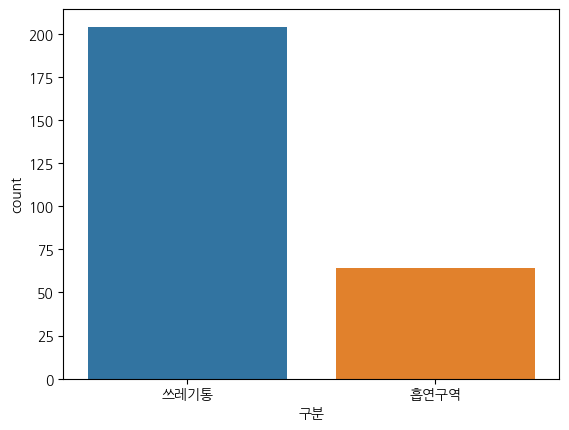

In [128]:
sns.countplot(data=df_melt, x='구분')

## 시각화2

In [133]:
x = melt_gb.index
y = melt_gb.values

구분 = []
대로 = []
for i in range(len(x)):
    구분.append(x[i][0])
    대로.append(x[i][1])

In [147]:
df = {'구분':구분, '대로':대로}
df = pd.DataFrame(df)
df.head()

,구분,대로
0,쓰레기통,도림로
1,쓰레기통,영등포로
2,쓰레기통,당산로
3,쓰레기통,디지털로
4,쓰레기통,대림로


In [149]:
df['대로명개수']=y
df.head()

,구분,대로,대로명개수
0,쓰레기통,도림로,22
1,쓰레기통,영등포로,22
2,쓰레기통,당산로,21
3,쓰레기통,디지털로,18
4,쓰레기통,대림로,17


In [151]:
melt_gb1 = melt_gb[melt_gb['주소']>1]

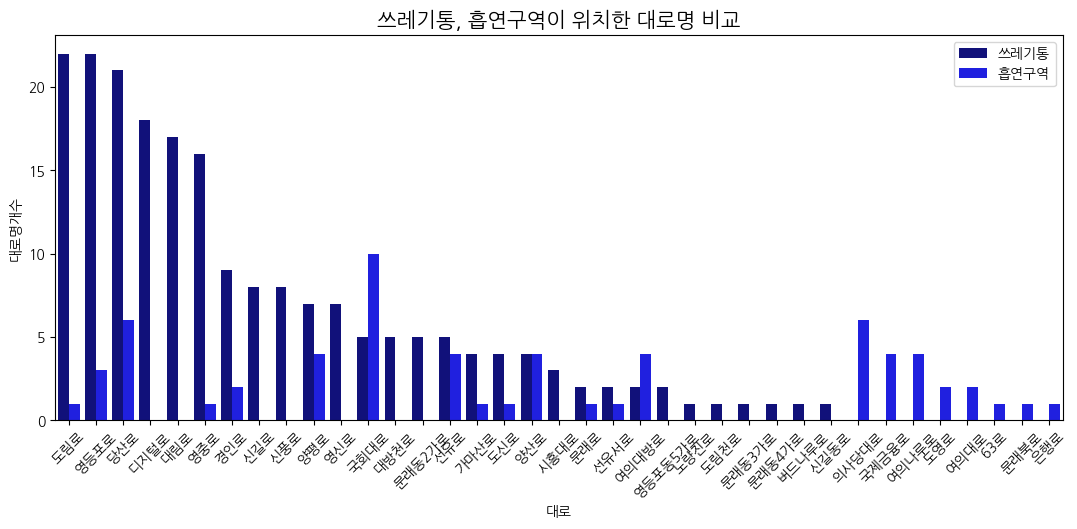

In [164]:
plt.figure(figsize=(13,5))
sns.barplot(data=df, x='대로', y='대로명개수', hue='구분', palette={'쓰레기통':'darkblue', '흡연구역':'blue'})
plt.title('쓰레기통, 흡연구역이 위치한 대로명 비교', fontsize=15)
plt.legend(loc='upper right')
plt.xticks(rotation=45);

## 시각화3

In [165]:
이진 = []
for i in df['구분']:
    if i == '쓰레기통':
        이진.append(0)
    elif i == '흡연구역':
        이진.append(1)

In [166]:
df['쓰레기통, 흡연구역 구분'] = 이진
df.head()

,구분,대로,대로명개수,"쓰레기통, 흡연구역 구분"
0,쓰레기통,도림로,22,0
1,쓰레기통,영등포로,22,0
2,쓰레기통,당산로,21,0
3,쓰레기통,디지털로,18,0
4,쓰레기통,대림로,17,0


In [167]:
corr = df.corr()
corr

,대로명개수,"쓰레기통, 흡연구역 구분"
대로명개수,1.000000,-0.358809
"쓰레기통, 흡연구역 구분",-0.358809,1.000000


In [168]:
corr = yeongdeung_m.corr()
corr

,쓰레기통위도,쓰레기통경도,흡연구역위도,흡연구역경도
쓰레기통위도,1.000000,-0.204524,-0.121813,0.044156
쓰레기통경도,-0.204524,1.000000,0.292176,-0.107884
흡연구역위도,-0.121813,0.292176,1.000000,-0.070595
흡연구역경도,0.044156,-0.107884,-0.070595,1.000000


<AxesSubplot:>

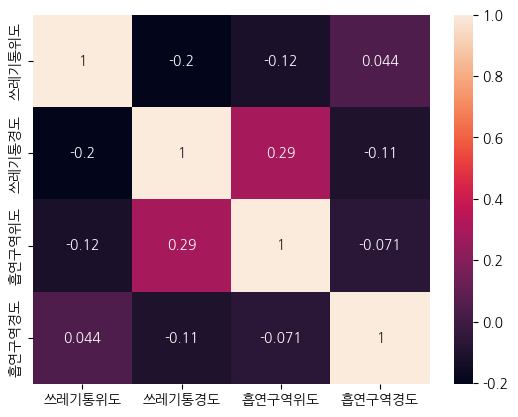

In [169]:
sns.heatmap(yeongdeung_m.corr(), annot=True)